# Root finding and optimization

## Introduction

In statistical applications, point estimation problems often boil down to maximize a function according to:

* maximize likelihood

* least squares

* maximum of a posterior distribution (i.e. bayesian)

When the function to be optimized is "smooth", we can reformulate optimization into a root finding problem.

**Trouble:** these problems often have no analytical solution.

## General setup

We will discuss 2 kinds of problems

* Root finding: solve $f(x) = 0$ for $x \in \mathbf{R}^d$, $d \geq 1$

* Optimization: maximize $g(x)$ for $x \in \mathbf{R}^d$, $d \geq 1$

We will address univariate and multivariate problems cases separately. We will look at methods that construct a sequence $\{ x_t : t \geq 0 \}$ designed to converge (as $t \xrightarrow{} \infty$) to the solution, denoted by $x^\star$.

### Theoretical considerations

* Under what conditions on $f$ (or $g$) and initial guess $x_0$ can we prove that $x_t \xrightarrow{} x^\star$?

* If $x_t \xrightarrow{} x^\star$, then how fast, i.e. what is its convergence order?

### Practical consideration

* How to write and implement the algorithm?

* Can't run the algorithm till $t = \infty$, so how to stop?

## Univariate problems

## Bisection (root-finding)

1. Find unique root $x^\star$ of $f$ in an interval $[a, b]$

* $f(a)f(b) \leq 0$ means a root exists between $a$ and $b$ (by the intermediate value theorem).

Pick an initial guess $x_0 = \frac{a + b}{2}$.

$x^\star$ must be in either $[ a, x_0 ]$ or $[ x_0, b ]$

Evaluate $f(x)$ at the end points to determine which one. The selected interval, call it $[a_1, b_1]$, is now just like the initial interval. Take $x_1 = \frac{a_1 + b_1}{2}$. Continue this process to construct a sequence $\{ x_t : t \geq 0 \}$.

### Algorithm

Assume $f(x)$ and the interval $[a, b]$ are given. 

1. Set $x = \frac{a+b}{2}$

2. If $f(a)f(b) \leq 0$, then $b=x$, else $a=x$.

3. If "converged", then stop; otherwise, return to step 1.

The convergence criteria is usually something like $| x_{new} - x_{old} | < \epsilon$ where $\epsilon$ is a specified small number (e.g. $\epsilon = 10^{-8}$).
A relative convergence riteria might be better $\frac{|x_{new} - x_{old}|}{x_{old}} < \epsilon$.

As a reminder, the limit of a sequence is defined by: $\forall \epsilon > 0, \ni N > 0$ s.t. $|U_N - l| < \epsilon$ where $N \xrightarrow{} \infty$ is the number of items in the sequence and $l$ is the value the sequence approaches.

**Theorem:** If $f$ is continuous, then $x_t \xrightarrow{} x^\star$. 

Time complexity: $\log n$

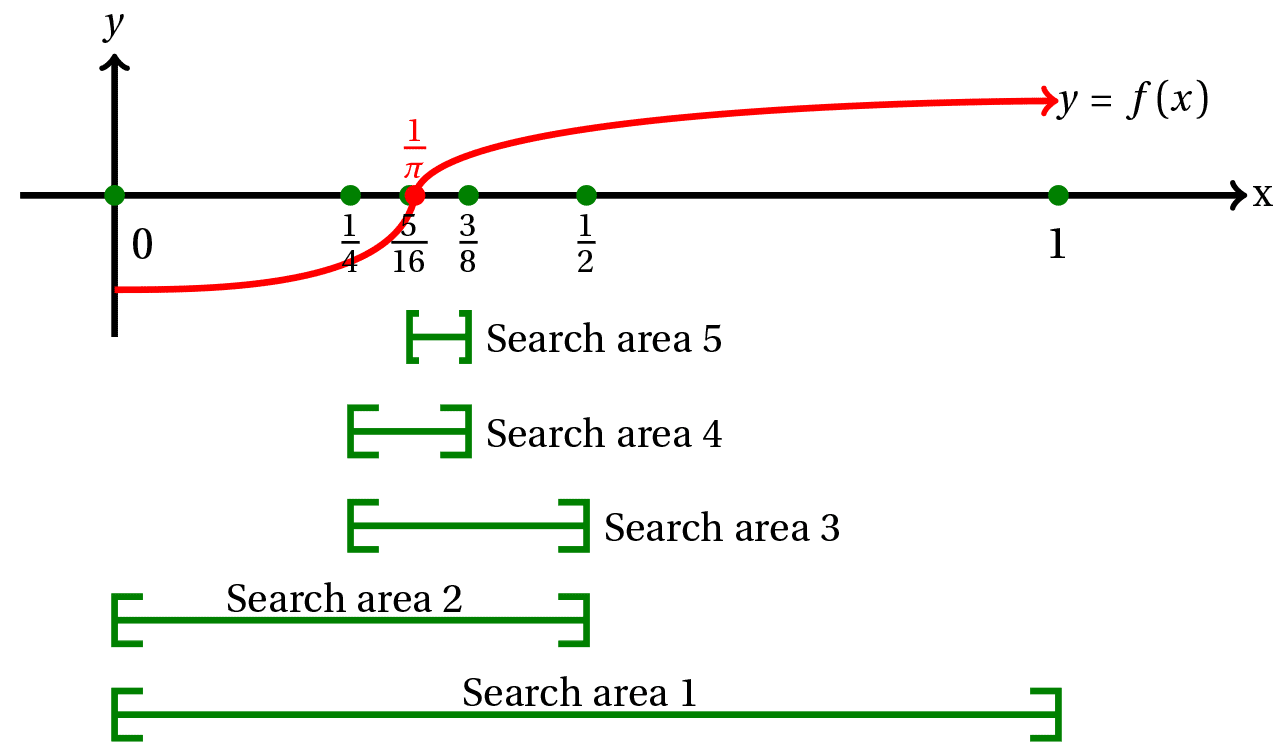

In [3]:
from utils import disp
disp('bisection_method.png')

## Newton's method (Newton-Raphson)

### Basic idea

Newton's method approximates a nonlinear function, which near its root by a linear function, can be solved by hand
It is based on Taylor's theorem, which gives the linear approximation of a function $f(x)$ in a neighborhood of some point $x_0$ as 

$$f(x) \approx f(x_0) + f^\prime(x_0) (x - x_0)$$

We can set this equal to 0 to solve for $x$

$$x = x_0 - \frac{f(x_0)}{f^\prime(x_0)}$$

### Algorithm - for root finding

Assume the function $f(x)$, its derivative $f^\prime(x)$, and an initial guess are given. 

* Set $t=0$

1. Calculate $x_{t+1} = x_t - \frac{f(x_t)}{f^\prime(x_t)}$

2. If the convergence criteria is met, then stop; otherwise, set $t \xleftarrow{} t+1$ and return to step 1.

### Warnings

Convergence depends on choice of $x_0$ and on $f$

Unlike bisection, Newton might not converge.


### Newton method theory

**Theorem**: If $f^{\prime\prime}$ is continuous and $x^\star$ is a root of $f$, with $f^\prime(x_0) \neq 0$, then there exists a neighborhood $N$ of $x^\star$ s.t. Newton's method converges to $x^\star$ for any $x_0 \in N$.

The proof uses taylor's approximation. Proof also shows that the convergence order is quadratic.

If Newton converges, then its way faster than bisection. But, added speed has a cost. It requires differentiability and the derivative $f^\prime$. Also, convergence is sensitive to choice of $x_0$.


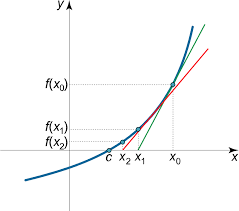

In [4]:
disp('newtons_method.png')

### Newton algorithm (for optimization)

In the context of unconstrained optimization, Newton's method can be used to find the optimum value. Apply the above method to find a root of $g^\prime(x) = 0$. The algorithm becomes 

Assume that the 1st derivative $g^\prime(x)$, its 2nd derivative $g^{\prime\prime}(x)$, and an initial guess $x_0$ are given. Set $t=0$,

i. Calculate $x_{t+1} = x_t - \frac{g^\prime(x_t)}{g^{\prime\prime}(x_t)}$

ii. If the convergence criteria is met, then stop; otherwise, set $t \xleftarrow{} t + 1$ and return to step i.

**Example:** Find $x^\star$ to maximize $g(x) = \frac{\log x}{1 + x}$, $x \in [1,5]$.

**a. Find root via bisection**



**b. Find root via newton's method**

In [5]:
import numpy as np
import sympy as sym
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 

class RootFinder:

    def __init__(self, sympy_f, x):

        self.sympy_f = sympy_f
        self.x = x
        self._calculate_derivative()
        self._calculate_derivative_2()
        self.f = self._lambify(self.sympy_f)

        self.bisection_x = None
        self.newton_x = None
        self.secant_x = None
        self.gss_x = None

        print('Function:')
        print(self.sympy_f)
        print('First derivative:')
        print(self.sympy_deriv)
        print('Second derivative')
        print(self.sympy_deriv_2)

    def _lambify(self, f):
        """Convert a function to a lambda function"""
        return sym.lambdify(self.x, f, "numpy")

    def _calculate_derivative(self):
        """Calculate the derivative of the function"""
        self.sympy_deriv =  sym.diff(self.sympy_f, self.x)
        self.deriv = self._lambify(self.sympy_deriv)
    
    def _calculate_derivative_2(self):
        """Calculate the second derivative of the function"""
        self.sympy_deriv_2 =  sym.diff(self.sympy_f, self.x, 2)
        self.deriv_2 = self._lambify(self.sympy_deriv_2)

    def set_problem(self, solution_type='root', # or 'max'
                    epsilon=1e-8, iter=1000):
        self.solution_type = solution_type
        self.epsilon = epsilon
        self.iter = iter

        if solution_type == 'root':
            self.problem_f = self.f
            self.problem_deriv = self.deriv
            self.conditional = lambda xs, iteration : ( abs(self.problem_f(xs[-1])) > self.epsilon ) or ( self.iter > iteration )
        elif solution_type == 'max':
            self.problem_f = self.deriv
            self.problem_deriv = self.deriv_2
            self.conditional = lambda xs, iteration : True if len(xs) < 2 else ( abs(self.problem_f(xs[-1] - xs[-2])) > self.epsilon ) or ( self.iter > iteration )

    def bisection_method(self, a, b):
        """
        Bisection method for root finding.
        """
        iteration = 0
        c = (a + b) / 2
        cs = [c]
        while self.conditional(cs, iteration):
            if self.problem_f(a) * self.problem_f(c) < 0:
                b = c
            else:
                a = c
            c = (a + b) / 2
            cs.append(c)
            iteration += 1
        self.bisection_x = c
        return c

    def newtons_method(self, x0):
        """
        Newton's method for root finding.
        """

        iteration = 0
        x = x0
        xs = [x]
        while self.conditional(xs, iteration):
            x = x - self.problem_f(x) / self.problem_deriv(x)
            iteration += 1
            xs.append(x)
        self.newton_x = x
        return x

    def secant_method(self, a, b):
        '''Approximate solution of f(x)=0 on interval [a,b] by the secant method.

        Parameters
        ----------
        f : function
            The function for which we are trying to approximate a solution f(x)=0.
        a,b : numbers
            The interval in which to search for a solution. The function returns
            None if f(a)*f(b) >= 0 since a solution is not guaranteed.

        Returns
        -------
        m_N : number
            The x intercept of the secant line on the the Nth interval
                m_n = a_n - f(a_n)*(b_n - a_n)/(f(b_n) - f(a_n))
            The initial interval [a_0,b_0] is given by [a,b]. If f(m_n) == 0
            for some intercept m_n then the function returns this solution.

        Examples
        --------
        >>> f = lambda x: x**2 - x - 1
        >>> secant(f,1,2,5)
        1.6180257510729614
        '''
        f = self.problem_f

        iteration = 0
        if f(a)*f(b) >= 0:
            print("Secant method fails.")
            return None
        a_n = a
        b_n = b
        xs = [a_n]
        #while abs(self.f(a_n)) > 0.01:
        while self.conditional(xs, iteration):
            m_n = a_n - f(a_n)*(b_n - a_n)/(f(b_n) - f(a_n))
            xs.append(m_n)
            iteration += 1
            f_m_n = f(m_n)
            if f(a_n)*f_m_n < 0:
                a_n = a_n
                b_n = m_n
            elif f(b_n)*f_m_n < 0:
                a_n = m_n
                b_n = b_n
            elif f_m_n == 0:
                break
        self.secant_x = m_n
        return m_n

    def golden_selection_search_method(self, a, b):

        f = self.problem_f
        c = (np.sqrt(5) - 1) / 2
        
        x1 = b - c * (b - a)
        x2 = a + c * (b - a)
        while abs(b - a) > self.epsilon:
            if f(x2) > f(x1):
                b = x2
                x2 = x1
                x1 = b - c * (b - a)
            else:
                a = x1
                x1 = x2
                x2 = a + c * (b - a)
        self.gss_x = x1 #could be a,b,x1,x2... they all converge
    
    def visualize(self, low=0, high=5):
        print(f"\nRoots Found: Bisection: x={self.bisection_x}, Newton's Method: x={self.newton_x}, Secant method: x={self.secant_x}, GSS Method: x={self.gss_x}")
        xx = np.linspace(low, high, 100)
        import matplotlib.pyplot as plt
        plt.plot(xx, self.f(xx))
        try:
            plt.scatter([self.bisection_x], [self.f(self.bisection_x)], marker='o', label=f'Bisection: x={round(self.bisection_x,2)}')
        except:
            pass
        try:
            plt.scatter([self.newton_x], [self.f(self.newton_x)], marker='o', label=f'Newton: x={round(self.newton_x,2)}')
        except:
            pass
        try:
            plt.scatter([self.secant_x], [self.f(self.secant_x)], marker='o', label=f'Secant: x={round(self.secant_x,2)}')
        except:
            pass
        try:
            plt.scatter([self.gss_x], [self.f(self.gss_x)], marker='o', label=f'GSS: x={round(self.gss_x,2)}')
        except:
            pass
        plt.legend()
        plt.show()



Function:
log(x)/(x + 1)
First derivative:
-log(x)/(x + 1)**2 + 1/(x*(x + 1))
Second derivative
(2*log(x)/(x + 1)**2 - 2/(x*(x + 1)) - 1/x**2)/(x + 1)

Roots Found: Bisection: x=1.0000000000000004, Newton's Method: x=1.0, Secant method: x=1.0, GSS Method: x=None


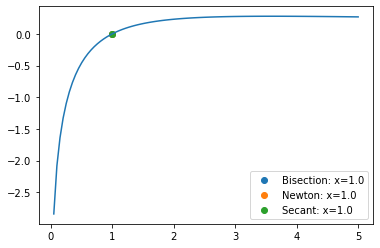

In [6]:
x = sym.Symbol('x')
rf = RootFinder(sym.log(x) / (x + 1), x)
rf.set_problem(solution_type='root', # or 'max'
               epsilon=1e-8, iter=1000)
b = rf.bisection_method(0, 5)
n = rf.newtons_method(0.5)
s = rf.secant_method(0.5, 5)
rf.visualize()


Function:
4*x**2*exp(-2*x)
First derivative:
-8*x**2*exp(-2*x) + 8*x*exp(-2*x)
Second derivative
8*(2*x**2 - 4*x + 1)*exp(-2*x)

Roots Found: Bisection: x=5.0, Newton's Method: x=1.0, Secant method: x=1.0, GSS Method: x=1.7071067733805956


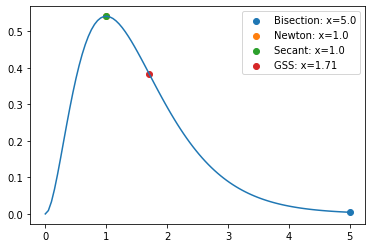

In [7]:
x = sym.Symbol('x')
rf = RootFinder(4 * x**2 * sym.exp(-2 * x), x)
rf.set_problem(solution_type='max', # or 'max'
               epsilon=1e-8, iter=1000)
b = rf.bisection_method(0, 5)
n = rf.newtons_method(0.5)
s = rf.secant_method(0.5, 5)
rf.golden_selection_search_method(0.5, 5)
rf.visualize()

Function:
-log(x) + exp(-x)
First derivative:
-exp(-x) - 1/x
Second derivative
exp(-x) + x**(-2)

Roots Found: Bisection: x=1.3097995858041505, Newton's Method: x=1.3097995858041505, Secant method: x=1.3097995858041505, GSS Method: x=None


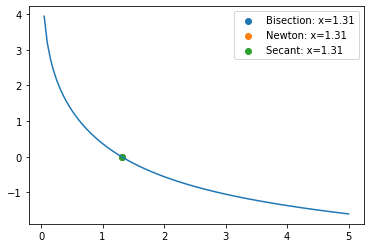

In [8]:
x = sym.Symbol('x')
rf = RootFinder(sym.exp(-x) - sym.log(x), x)
rf.set_problem(solution_type='root', # or 'max'
               epsilon=1e-8, iter=1000)
b = rf.bisection_method(0, 5)
n = rf.newtons_method(0.5)
s = rf.secant_method(0.5, 5)
rf.visualize()


## Secant method

### Basic idea

Newton's method requires a formula for $f^\prime(x)$. To avoid this, approximate $f^\prime(x)$ at $x_0$ by a difference ratio. That is, recall from calculus that 
$$f^\prime(x) \approx \frac{f(x+h) - f(x)}{h}$$
where $h$ is small and positive.

This can also be expressed as
$$f^\prime(x) \approx \frac{f(x) - f(x_0)}{x - x_0}$$

The secant method follows Newton's method except we substitute a differenceratio for $f^\prime(x)$. Name is because the linear approximaiton is a secant not a tangent.

### Algorithm

Suppose $f(x)$ and 2 initial guesses $x_0$ and $x_1$ are given. Set $t=1$.

i. Calculate $x_{t+1} = x_t - \frac{f^\prime(x_t)}{\frac{f^\prime(x_t) - f^\prime(x_{t-1})}{x_t - x_{t-1}}}$

i.e. $x_{t+1} = x_t - f^\prime(x_t) \frac{x_t - x_{t-1}}{f^\prime(x_t) - f^\prime(x_{t-1})}$

If the convergence criteria are satisfied, then stop. Else, set $t\xleftarrow{} t+1$ and return to step i.

### Remarks

Can be unstable at early iterations bc the difference ratio may be a poor approximation of $f^\prime$; reasonable sacrifice if $f^\prime$ is not available.

If secant method converges, order is almost quadratic (similar to newton method).


## Fisher Scoring

In maximum likelihood applications, the goal is to find roots of the log-likelihood function, ie. $l^\prime(\hat{\theta}) = 0$.

In this context, Newton's method looks like 

$$\theta_{t+1} = \theta_t - \frac{l^\prime(\theta_t)}{l^{\prime\prime}(\theta_t)}$$

$t \geq 0$.

Recall that $-l^{\prime\prime}(\theta)$ is an approximate of the Fisher information $I_n(\theta)$. So, we can rewrite Newton's method as 

$$\theta_{t+1} = \theta_t + \frac{l^\prime(\theta_t)}{I_n(\theta_t)}$$

$t \geq 0$.

This modification is called Fisher's scoring

### Example: $g(x) = \frac{\log x}{1+x}$

#### Newton's Method

$x_{t+1} = x_t + h_t$ where $h_t = -\frac{g^\prime(x_t)}{g^{\prime\prime}(x_t)}$

$g^\prime(x) = -log(x)/(x + 1)^2 + 1/(x*(x + 1))$

The netwon increment is 

$h_t = \frac{(x_t + 1)(1 + 1/x_t - \log x_t)}{3 + 4/x_t + 1/(x_t)^2 - 2 \log x_t}$

#### Secant method

$x_{t+1} = x_t - g^\prime(x_t) \frac{x_t - x_{t-1}}{g^\prime(x_t) - g^\prime(x_{t-1})}$

## Golden section search (GSS) method

It is a simple way of finding the minimizer of a function $f$ which has a simple minimum on the interval $[a, b]$. Assume that $f(x)$ is a continuous function.

Note that the method applies as well as to find the maximum.

The ideas of GSS are similar to bisection.

In designing the method, we seek to satisfy 2 goals:

1. An optimal reduction factor for the search interval
2. minimum number of function calls

So we want to perform 1 new function evaluation in each step. Also, we want a constant reduction factor, say c, for the size of the interval.

For $x_1$ and $x_2$ in $[a,b]$, there are 2 cases.

1. if $f(x_1) < f(x_2)$, then $[a,b] \xrightarrow{} [a, x_2]$ with interval size reduction $x_2 - a = c(b-a) \xrightarrow{} x_2 = (1 - c)a + cb$
2. if $f(x_1) > f(x_2)$, then $[a,b] \xrightarrow{} [x_1, b]$ with interval size reduction $b - x_1 = c(b-a) \xrightarrow{} x_1 = ca + (1 - c)b$

Thus, once we know "c", we know the location of $x_1$ and $x_2$

Without loss of generality, we focus on the case $f(x_1) < f(x_2)$. For ease of calculation, take $[a, b] = [0, 1]$.

If $f(x_1) < f(x_2)$, then we recycle $x_1 = 1 - c$ and have to determine where to evaluate next, either a the left, or at the right of $1 - c$.

i. Suppose we place a new function evaluation at the left of $x_1 = 1 - c$. It can be shown that $c$ is obtained by solving $c^2 + c - 1 = 0$. The positive root leads to $c = \frac{-1 + \sqrt{5}}{2}$ which equals approximately $0.6180$.

ii. Suppose we place a new function evaluation at the right of $x_1 = 1 - c$. It can be shown that $c$ is obtained by solving $1 - c^2 = 0$. The (double) root of this equation is 1, which is unhelpful because it does not give any reduction! So, we exclude this possibility.

Thus, we have 2 rules:

1. If $f(x_1) < f(x_2)$, we keep $x_1$ which becomes $x_2$ and we compute a new $x_1$. using $b - x_1 = c(b-a) \xrightarrow{} x_1 = ca + (1 - c)b$. 

2. If $f(x_1) > f(x_2)$, we keep $x_2$ which becomes $x_1$ and we compute a new $x_2$. using $x_2 - a = c(b-a) \xrightarrow{} x_2 = (1 - c)a + cb$.

$c = \frac{\sqrt{5} - 1}{2}$ is called the **golden ratio**.

### GSS Algorithm

**Step 1:** Given initial interval $[a_1, b_1]$ and precision $\epsilon$, set $c = \frac{\sqrt{5} - 1}{2} = 0.618$.  Calculate $x^1_1 = b_1 - c(b_1 - a_1)$ and $x_2^1 = a_1 + c(b_1 - a_1)$.

**Step 2:** If $f(x_2^i) > f(x_1^i)$, update $a_{i+1} = a_i$, $b_{i+1} = x_2^i$, $x_2^{i+1} = x_1^i$, $x_1^{i+1} = b_{i+1} - c(b_{i+1} - a_{i+1})$

If $f(x_2^i) \leq f(x_1^i)$, update $a_{i+1} = x_1^i$, $b_{i+1} = b_i$, $x_1^{i+1} = x_2^i$, $x_2^{i+1} = a_{i+1} + c(b_{i+1} - a_{i+1})$

**Step 3:** If $|b_{i+1} - a_{i+1}| \leq \epsilon$, stop; otherwise, set $i \xleftarrow{} i+1$ and go to step 2.

## Multivariate optimization problems

### Newton's method

Suppose that $g(\vec{x})$ is a function of several variables, say $\vec{x} = (x_1, x_2, ..., x_p) \in \mathbf{R}^p$.

Newton's method works exactly the same as before, just the derivatives are more complicated.

$\dot{g}(\vec{x})$ is the gradient-vector of first partial derivatives

$\ddot{g}(\vec{x})$ is the Hessian-matrix of second partial derivatives

Based on Taylor's formula, Newton's method is $\vec{x}^{(t+1)} = \vec{x}^{(t)} - [\ddot{g}(x^{(t)})]^{-1} \dot{g}(x^{(t)})$

**Example:** Let $\vec{x} = (x_1, x_2)$ and $g(\vec{x}) = 0.5 x_1^2 + 2.5 x_2^2$

$g: \mathbf{R}^2 \xrightarrow{} \mathbf{R}$

($\mathbf{R}^p \xrightarrow{} \mathbf{R}$)

Using Newton's update, we have $\vec{x}^{(t+1)} = \vec{x}^{(t)} - [\ddot{g}(x^{(t)})]^{-1} \dot{g}(x^{(t)})$

Where $$\dot{g}(x) = \begin{bmatrix} \frac{\delta g}{\delta x_1}\\ \frac{\delta g}{\delta x_2}\end{bmatrix} = \begin{bmatrix} x_1 \\ 5x_2\\ \end{bmatrix}$$ and $$\ddot{g}(\vec{x}) = \begin{bmatrix}
\frac{\delta^2 g}{\delta x_1^2} & \frac{\delta^2 g}{\delta x_1 x_2}\\
\frac{\delta^2 g}{\delta x_2 x_1} & \frac{\delta^2 g}{\delta x_2^2}\\
\end{bmatrix} = \begin{bmatrix}
1 & 0\\
0 & 5\\
\end{bmatrix}$$

**Example:** (Example 2.4 on pg 35 in Gibbons + H)

Apply Newton's method to a complicated bivariate function

Function:
0.5*x**2 + 2.5*y**2
First derivative:
[1.0*x 5.0*y]
Second derivative
[[1.00000000000000 0]
 [0 5.00000000000000]]

Starting Newton-Raphson with specification: {x: 1, y: 1}
Found root: [0. 0.]


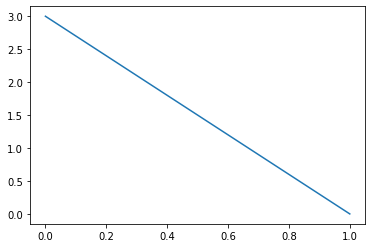

In [8]:
import numpy as np
import sympy as sym
from itertools import permutations, product
import matplotlib.pyplot as plt

class RootFinder:

    def __init__(self, sympy_f):
        self.sympy_f = sympy_f
        self.vars = list(sympy_f.free_symbols)
        self._calculate_derivative()
        self._calculate_derivative_2()
        self._inv_jacobian()
        self.f = self._lambify(self.sympy_f)

        self.newton_x = None

        print('Function:')
        print(self.sympy_f)
        print('First derivative:')
        print(self.deriv_vec)
        print('Second derivative')
        print(self.jacobian)
        print()

    def _lambify(self, f):
        """Convert a function to a lambda function"""
        return lambda x : float(f.evalf(subs=dict(zip(self.vars, x))))

    def _calculate_derivative(self):
        """Calculate the derivative of the function"""

        num_params = len(self.vars)
        self.deriv_vec = np.zeros((num_params,), dtype=object)
        self.deriv_vec_lambdify = np.zeros((num_params,), dtype=object)
        # Add all squared terms
        for a in self.vars:
            idx_a = self.vars.index(a)
            sympy_partial_deriv = sym.diff(self.sympy_f, a)
            self.deriv_vec[idx_a] = sympy_partial_deriv
            self.deriv_vec_lambdify[idx_a] = self._lambify(sympy_partial_deriv)
    
    def _calculate_derivative_2(self):
        """Calculate the second derivative of the function"""
        # Add all pairs
        combins = list(permutations(self.vars, 2))

        # Establish jacobian
        num_params = len(self.vars)
        jacobian = np.zeros((num_params, num_params), dtype=object)
        jacobian_lambdify = np.zeros((num_params, num_params), dtype=object)

        # Add all squared terms
        for a in self.vars:
            idx_a = self.vars.index(a)
            sympy_partial_deriv = sym.diff(self.sympy_f, a)
            sympy_sec_partial_deriv = sym.diff(sympy_partial_deriv, a)
            jacobian[idx_a, idx_a] = sympy_sec_partial_deriv
            jacobian_lambdify[idx_a, idx_a] = self._lambify(sympy_sec_partial_deriv)

        for (a, b) in combins:
            idx_a = self.vars.index(a)
            idx_b = self.vars.index(b)
            sympy_partial_deriv = sym.diff(self.sympy_f, a)
            sympy_sec_partial_deriv = sym.diff(sympy_partial_deriv, b)
            jacobian[idx_a, idx_b] = sympy_sec_partial_deriv
            jacobian_lambdify[idx_a, idx_b] = self._lambify(sympy_sec_partial_deriv)

        self.jacobian = jacobian
        self.jacobian_lambdify = jacobian_lambdify       

    def _inv_jacobian(self):
        jacobian = sym.Matrix(self.jacobian)
        inv_jacobian = jacobian.inv()
        inv_jacobian = np.array(inv_jacobian, dtype=object)
        self.inv_jacobian = inv_jacobian

        inv_jacobian_lambdify = np.zeros((len(inv_jacobian), len(inv_jacobian)), dtype=object)
        for i in range(len(inv_jacobian)):
            for j in range(len(inv_jacobian)):
                inv_jacobian_lambdify[i, j] = self._lambify(inv_jacobian[i, j])
        self.inv_jacobian_lambdify = inv_jacobian_lambdify

    def _evaluate_func_arr(self, f, x):
        # function f is an array (vector or matrix) of lambdas
        # x is a scalar or array of input values
        shape = f.shape
        output = np.zeros(shape)
        for idx in product(*[range(s) for s in shape]):
            output[idx] = f[idx](x)
        return output

    def newtons_method(self, x0, epsilon):
        """
        Newton's method for root finding.

        x0 must be of length = number of variables in expression, organized according to order in `self.vars`
        """
        print("Starting Newton-Raphson with specification:", dict(zip( self.vars, x0 )))
        x = x0
        self.xs = [x]
        self.fs = [self.f(x)]
        while abs(self.f(x)) > epsilon:
            inv_jacob_x = self._evaluate_func_arr(self.inv_jacobian_lambdify, x)
            deriv_x = self._evaluate_func_arr(self.deriv_vec_lambdify, x)
            x = x - inv_jacob_x @ deriv_x
            self.xs.append(x)
            self.fs.append(self.f(x))
        self.newton_x = x
        return x

    def plot(self):
        plt.plot(self.fs)
        plt.show()

x = sym.Symbol('x')
y = sym.Symbol('y')
rf = RootFinder(0.5 * x**2 + 2.5 * y**2)

n = rf.newtons_method([1, 1], 1e-6)
print("Found root:", n)
rf.plot()

In [15]:
x = sym.Symbol('x')
y = sym.Symbol('y')
rf = RootFinder(-(5 * x**2 + y**2 + 4 * x * y - 14 * x - 6 * y + 20))

# Add minimum functionality
#n = rf.newtons_method([1, 1], 1e-6)
#print("Found root:", n)

Function:
-5*x**2 - 4*x*y + 14*x - y**2 + 6*y - 20
First derivative:
[-10*x - 4*y + 14 -4*x - 2*y + 6]
Second derivative
[[-10 -4]
 [-4 -2]]



In [13]:
x = sym.Symbol('x')
y = sym.Symbol('y')
rf = RootFinder((-1)*((((x**2)+y-11)**2)+(x+(y**2)-7)**2))

# Add minimum functionality
n = rf.newtons_method([1, 1], 1e-6)
print("Found root:", n)

Function:
-(x + y**2 - 7)**2 - (x**2 + y - 11)**2
First derivative:
[-4*x*(x**2 + y - 11) - 2*x - 2*y**2 + 14
 -2*x**2 - 4*y*(x + y**2 - 7) - 2*y + 22]
Second derivative
[[-12*x**2 - 4*y + 42 -4*x - 4*y]
 [-4*x - 4*y -4*x - 12*y**2 + 26]]

Starting Newton-Raphson with specification: {x: 1, y: 1}
Found root: [-3.77935206 -3.2832109 ]


## Newton-like methods

Newton's methods rely on updating equations $x^{(t+1)} = x^{(t)} + h^{(t)}$ where $h^{(t)} = -[ \ddot{g}(x^{(t)})]^{-1} \dot{g}(x^{(t)})$. The difficulty in the multivariate case is the derivation and/or computation of the Hessian matrix and its inverse.

A Newton-like method uses instead $$x^{(t+1)} = x^{(t)} - [M^{(t)}]^{-1} \dot{g}(x^{(t)})$$ where $M^{(t)}$ approximates the Hessian matrix.

**Question:** Is it possible to use some other matrix, say $M^{(t)}$, in place of the Hessian?

Yes!

This idea inspires a medley of algorithms:

## Steepest ascent/descent method

Fix matrices $M^{(t)}$ and numbers $\alpha^{(t)}, t\geq 0$.

Ascent/decsent method look like $$x^{(t+1)} = x^{(t)} - \alpha^{(t)} [M^{(t)}]^{-1} \dot{g}(x^{(t)})$$

Goal is to choose $M^{(t)}$ and $\alpha^{(t)}$ s.t. the function increases/decreases when $x^{(t)}$ is updated to $x^{(t+1)}$.

We simplify the problem by setting $M^{(t)} = -I$ for ascent and descent takes $M^{(t)} = I$.

Motivation is the basic fact from multivariate calculus that the gradient points in the direction of steepest ascent. Then, the algorithm looks like

$$x^{(t+1)} = x^{(t)} + \alpha^{(t)} \dot{g}(x^{(t)})$$

 Or, for steepest descent, 

$$x^{(t+1)} = x^{(t)} - \alpha^{(t)} \dot{g}(x^{(t)})$$

s.t. $t \geq 0$ and where $\alpha^{(t)}$ is the **line search** parameter that determines how far to go in a given direction.

### How do we pick a good $\alpha^{(t)}$?

i. Determine appropriate value for $\alpha^{(t)}$ at each iteration in a one-dimensional minimization problem

$$\min_{\alpha^{(t)}} g( x^{(t)} - \alpha^{(t)} \dot{g}(x^{(t)}) )$$

can be solved by methods already discussed.

Golden Section Search and Bisection can be used for steepest descent.

ii. Another approach is "backtracking"

- Backtracking approach determines $\alpha^{(t)}$ iteratively: (Ascent)

1. Start with $\alpha^{(t)} = 1$

2. Compute update $x^{(t+1)}$ with this $\alpha^{(t)}$

3. If ascent holds, then increment $t$; otherwise, set $\alpha^{(t)} \xleftarrow{} \frac{\alpha^{(t)}}{2}$ and go back to step 2.

### Common choices of the step size

1. Exact line search

$$\alpha^{(t)} \equiv \argmin_{\alpha \geq 0} g(x^{(t)} - \alpha^{(t)} \dot{g}(x^{(t)}))$$

if $g$ is convex, the one-dimensional minimization problem is also convex.

2. Limited minimization

$$\alpha^{(t)} \equiv \argmin_{\alpha \in [0, s]} g(x^{(t)} - \alpha \dot{g}(x^{(t)}))$$

3. Constant stepsize $\alpha^{(t)} = s > 0$ for all $t$

simple rule but may not converge if it is too large or may converge too slow bc it is too small.

4. Diminishing step size

$\alpha^{(t)} \xrightarrow{} 0$ and $\sum_{t=1}^\infty \alpha^{(t)} = \infty$

For example, $\alpha^{(t)} = \frac{1}{t}$

Descent not guaranteed at each step, only later when $\alpha^{(t)}$ becomes small

$\sum_{t=1}^\infty \alpha^{(t)} = \infty$ imposed to guarantee progress, does not become too slow.

Remarks: Good theoretical guarantees, but unless the right sequence is chosen, can also be a slow method.

5. Successive step size reduction

Well known examples are Armijo rule (i.e. backtracking) and Goldstein rule

**Example:** For exact line search, we want to apply the method of steepest descent to the function $f(x,y) = 4x^2 - 4xy + 2y^2$ with initial point $x_0 = (2,3)$

Remember, we are trying to find $\alpha^{(t)}$ st
$$\alpha^{(t)} \equiv \argmin_{\alpha \geq 0} g(x^{(t)} - \alpha^{(t)} \dot{g}(x^{(t)}))$$

Gradient of $f$ is $\nabla f(x,y) = [\frac{\delta f}{\delta x}, \frac{\delta f}{\delta y}]^\prime = [8x-4y , 4y-4x]^\prime$, which is the steepest descent direction.

Starting at $x^{(0)} = (2,3)^\prime$, we ahve $\nabla f(x^{(0)}) = \nabla f(2,3) = (4,4)^\prime$

Choose $- \nabla f(x^{(0)}) = (-4, -4)^\prime$ as the direction of steepest descent.

Perform line search along $(-4,4)^\prime$ direction.

$$\begin{align*}
\phi(\alpha^{(0)}) &= f( (2,3) - \alpha^{(0)} \nabla f(2,3) )\\
&= f( x^{(0)} - \alpha^{(0)} \nabla f(x^{(0)}))\\
&= f(2 - 4 \alpha^{(0)}, 3 - 4 \alpha^{(0)})\\
\end{align*}$$

Next step is to 

$$\begin{align*}
\min_{\alpha^{(0)}} \phi(x^{(0)})\\
\min_{\alpha^{(0)}} f(2 - 4 \alpha^{(0)}, 3 - 4 \alpha^{(0)})\\
\min_{\alpha^{(0)}} (32\alpha^{(0)2} - 32 \alpha^{(0)} + 10)\\
\end{align*}$$

This strictly convex function has a strict global minimum when $\phi^\prime(\alpha) = 0$ at $\alpha^{(0)} = \frac{1}{2}$.

Set $x^{(1)} = x^{(0)} - \alpha^{(0)} \nabla f(x^{(0)}) = (2,3) - \frac{1}{2} (4,4) = (0,1)$

Continuing the process, we have $\nabla f(x^{(1)}) = \nabla f(0,1) = (-4, 4)$ and by defining $\phi(x^{(1)}) = f(x^{(1)} - \alpha^{(1)} \nabla f(x^{(1)})) = f((0,1) - \alpha^{(1)} (-4, 4)) = f(-4\alpha^{(1)}, 1 - 4\alpha^{(1)})$.

Proceed in a similar manner as before to get $\alpha^{(1)} = \frac{1}{10}$.

Set $x^{(2)} = x^{(1)} - \alpha^{(1)} \nabla f(x^{(1)}) = (0, 1) - \frac{1}{10} (-4, 4) = (\frac{2}{5}, \frac{3}{5})$.

Repeat this process until solution.

We can see that the method of steepest descent produces a sequence of iterates $x^{(t)}$ that is converging to the strict global minimizer of $f(x,y)$ at $x^\star = (0,0)$



In [ ]:
# Code this

### Theorems

The following theorems describe some important properties of the method of steepest descent.

**Theorem 1:** Let $f: \mathbf{R}^n \xrightarrow{} \mathbf{R}$ be continuously differentiable on $\mathbf{R}^n$ and let $x_0 \in D$. Let $\alpha^\star > 0$ be the minimizer of $\phi(\alpha) = f(x_0 - \alpha \nabla f(x_0)), \alpha \geq 0$ and let $x_1 = x_0 - \alpha^\star \nabla f(x_0)$. Then, $f(x_1) < f(x_0)$.

In layman's terms: *Therefore, if you are heading in the direction of steepest descent, then you are headed in the right direction.*

**Theorem 2:** Let $f: \mathbf{R}^n \xrightarrow{} \mathbf{R}$ be continuously differentiable in $\mathbf{R}^n$ and let $x_k$ and $x_{k+1}$, for $k \geq 0$ be two consecutive iterates produced by the method of steepest descent. Then, the steepest directions from $x_k$ and $x_{k+1}$ are orthogonal, that is $\nabla f(x_k) \times \nabla f(x_{k+1}) = 0$.

**Theorem 3:** Let $f: \mathbf{R}^n \xrightarrow{} \mathbf{R}$ be a coercive function with continuous partial derivatives on $\mathbf{R}^n$. Then, for any initial guess $x_0$ the sequence of iterates produced by the method of steepest descent from $x_0$ contains a subsequence that converges to a critical point of $f$.

This result can be proved by applying the Bolzano-Weierstranss theorem.